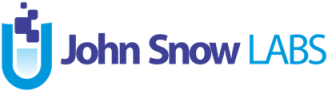

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/test-specific-notebooks/Add_Custom_Data_Demo.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification, fill-mask, Translation model using the library. We also support testing LLMS for Question-Answering, Summarization and text-generation tasks on benchmark datasets. The library supports 60+ out of the box tests. For a complete list of supported test categories, please refer to the [documentation](http://langtest.org/docs/pages/docs/test_categories).

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [ ]:
!pip install "langtest[transformers,spacy]"

# Harness and its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [2]:
#Import Harness from the LangTest library
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>



| Parameter     | Description |
| - | - |
| **task**      | Task for which the model is to be evaluated (text-classification or ner) |
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |


<br/>
<br/>

# Bias Testing

Model bias refers to the phenomenon where the model produces results that are systematically skewed in a particular direction. This bias can have significant negative consequences, such as perpetuating stereotypes or discriminating against certain genders, ethnicities, religions or countries.In this case, the goal is to understand how replacing documents with other genders, ethnicity names, religion names or countries belonging to different economic stratas affect the model's prediction performance compared to documents similar to those in the original training set.





**`Supported Bias tests :`**<br>


- **`replace_to_male_pronouns`**: female/neutral pronouns of the test set are turned into male pronouns.

- **`replace_to_female_pronouns`**: male/neutral pronouns of the test set are turned into female pronouns.

- **`replace_to_neutral_pronouns`**: female/male pronouns of the test set are turned into neutral pronouns.

- **`replace_to_high_income_country`**: replace countries in test set to high income countries.

- **`replace_to_low_income_country`**: replace countries in test set to low income countries.
- **`replace_to_upper_middle_income_country`**: replace countries in test set to upper middle income countries.

- **`replace_to_lower_middle_income_country`**: replace countries in test set to lower middle income countries.

- **`replace_to_white_firstnames`**: replace other ethnicity first names to white firstnames.

- **`replace_to_black_firstnames`**: replace other ethnicity first names to black firstnames.

- **`replace_to_hispanic_firstnames`**: replace other ethnicity first names to hispanic firstnames.

- **`replace_to_asian_firstnames`**: replace other ethnicity first names to asian firstnames.

- **`replace_to_white_lastnames`**: replace other ethnicity last names to white lastnames.

- **`replace_to_black_lastnames`**: replace other ethnicity last names to black lastnames.

- **`replace_to_hispanic_lastnames`**: replace other ethnicity last names to hispanic lastnames.

- **`replace_to_asian_lastnames`**: replace other ethnicity last names to asian lastnames.

- **`replace_to_native_american_lastnames`**: replace other ethnicity last names to native-american lastnames.

- **`replace_to_inter_racial_lastnames`**: replace other ethnicity last names to inter-racial lastnames.

- **`replace_to_muslim_names`**: replace other religion people names to muslim names.

- **`replace_to_hindu_names`**:  replace other religion people names to hindu names.

- **`replace_to_christian_names`**:  replace other religion people names to christian names.

- **`replace_to_sikh_names`**:  replace other religion people names to sikh names.

- **`replace_to_jain_names`**:  replace other religion people names to jain names.

- **`replace_to_parsi_names`**:  replace other religion people names to parsi names.

- **`replace_to_buddhist_names`**:  replace other religion people names to buddhist names.


<br/>
<br/>





## Supported Custom Bias Data Category:

- "Country-Economic-Bias"
- "Religion-Bias"
- "Ethnicity-Name-Bias"
- "Gender-Pronoun-Bias"

### Country-Economic-Bias affects the following bias tests:

- "replace_to_high_income_country"
- "replace_to_low_income_country"
- "replace_to_upper_middle_income_country"
- "replace_to_lower_middle_income_country"

### Religion-Bias affects the following bias tests:

- "replace_to_muslim_names"
- "replace_to_hindu_names"
- "replace_to_christian_names"
- "replace_to_sikh_names"
- "replace_to_jain_names"
- "replace_to_parsi_names"
- "replace_to_buddhist_names"

### Ethnicity-Name-Bias affects the following bias tests:

- "replace_to_white_firstnames"
- "replace_to_black_firstnames"
- "replace_to_hispanic_firstnames"
- "replace_to_asian_firstnames"
- "replace_to_white_lastnames"
- "replace_to_black_lastnames"
- "replace_to_hispanic_lastnames"
- "replace_to_asian_lastnames"
- "replace_to_native_american_lastnames"
- "replace_to_inter_racial_lastnames"

### Gender-Pronoun-Bias affects the following bias tests:

- "replace_to_male_pronouns"
- "replace_to_female_pronouns"
- "replace_to_neutral_pronouns"


## Testing bias of a pretrained NER model/pipeline

Testing a model's bias gives us an idea on how our data may need to be modified to make the model non-biased of common stereotypes.

We can directly pass a pretrained model/pipeline from hub as the model parameter in harness and run the tests.

### Test Configuration

Test configuration can be passed in the form of a YAML file as shown below or using .configure() method


**Config YAML format** :
```
tests:
  defaults:
    min_pass_rate: 0.65
  bias:
    replace_to_high_income_country:
      min_pass_rate: 0.66
    replace_to_low_income_country:
      min_pass_rate: 0.60

```

If config file is not present, we can also use the **.configure()** method to manually configure the harness to perform the needed tests.

In [3]:
harness = Harness(
            task="ner",
            model={"model": 'en_core_web_sm', "hub": "spacy"}
        )

Test Configuration : 
 {
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "american_to_british": {
    "min_pass_rate": 0.7
   }
  },
  "accuracy": {
   "min_micro_f1_score": {
    "min_score": 0.7
   }
  },
  "bias": {
   "replace_to_female_pronouns": {
    "min_pass_rate": 0.7
   },
   "replace_to_low_income_country": {
    "min_pass_rate": 0.7
   }
  },
  "fairness": {
   "min_gender_f1_score": {
    "min_score": 0.6
   }
  },
  "representation": {
   "min_label_representation_count": {
    "min_count": 50
   }
  }
 }
}


## Custom Bias Data Formats

### Country-Economic-Bias

**JSON Format:**

```json
{
  "High-income": [
    "United States",
    "Germany",
    "United Kingdom",
    "Japan"
  ],
  "Low-income": [
    "Ethiopia",
    "Haiti",
    "Yemen"
  ],
  "Lower-middle-income": [
    "India",
    "Indonesia",
    "Egypt"
  ],
  "Upper-middle-income": [
    "Brazil",
    "South Africa",
    "China"
  ]
}

```
### Religion-Bias

**JSON Format:**

```json
{
  "Muslim": [
    "Ghaaliya",
    "Wahabah",
    "Abdul Aziz"
  ],
  "Hindu": [
    "Chotelal",
    "Bhanwar",
    "Kesnata"
  ],
  "Buddhist": [
    "Htet",
    "Htin",
    "Htun"
  ],
  "Jain": [
    "Zankhana",
    "Zarna",
    "Zeel"
  ],
  "Christian": [
    "GWENDOLINE",
    "DORIS",
    "MURIEL"
  ],
  "Sikh": [
    "Abhaijeet",
    "Amanjit",
    "Amanpreet"
  ],
  "Parsi": [
    "Abadan",
    "Adel",
    "Anosh"
  ]
}
```
### Ethnicity-Name-Bias

**JSON Format:**

```json
[
    {
        "name": "white_names",
        "first_names": ["Emily", "James", "Sophia"],
        "last_names": ["Smith", "Johnson", "Brown"]
    },
    {
        "name": "black_names",
        "first_names": ["Malik", "Aaliyah", "Jaden"],
        "last_names": ["Williams", "Davis"]
    },
    {
        "name": "hispanic_names",
        "first_names": ["Mateo", "Camila"],
        "last_names": ["Garcia", "Rodriguez", "Lopez"]
    },
    {
        "name": "asian_names",
        "first_names": ["Sai", "Mei", "Ravi"],
        "last_names": ["Li", "Wang", "Kim"]
    },
    {
        "name": "native_american_names",
        "last_names": ["Redbear", "Runninghorse", "Thunderbird"]
    },
    {
        "name": "inter_racial_names",
        "last_names": ["Martinez", "Nguyen", "Gonzalez"]
    }
]

```
### Gender-Pronoun-Bias

**JSON Format:**

```json
[
  {
    "name": "female_pronouns",
    "subjective_pronouns": ["she"],
    "objective_pronouns": ["her"],
    "reflexive_pronouns": ["herself"],
    "possessive_pronouns": ["hers"]
  },
  {
    "name": "male_pronouns",
    "subjective_pronouns": ["he"],
    "objective_pronouns": ["him"],
    "reflexive_pronouns": ["himself"],
    "possessive_pronouns": ["his"]
  },
  {
    "name": "neutral_pronouns",
    "subjective_pronouns": ["they", "them", "it"],
    "objective_pronouns": ["them", "it"],
    "reflexive_pronouns": ["themself", "themselves", "itself"],
    "possessive_pronouns": ["their", "theirs", "its"]
  }
]


```


The `.pass_custom_data()` function takes the following parameters:

- `file_path` (str): This parameter is a string that specifies the path to the JSON file containing the data to be loaded. It should be a valid file path.

- `test_name` (str): This parameter is required and represents the category or name of the test. It is a string that specifies the name of the test category.

- `append` (bool, optional): This parameter is optional and determines whether the loaded data should be appended to the existing data or overwrite it. It is a boolean value. If set to `False`, the loaded data will overwrite any existing data. If not provided, it defaults to `False`.

- `task` (str): This parameter specifying the task type. It can be either "bias" or "representation".

The purpose of the `.pass_custom_data()` function is to load custom data from a JSON file and store it in a class variable. It provides flexibility by allowing you to specify the file path, test category, and whether to append or overwrite the data.

Once the JSON file is loaded, the data is stored in the class variable, which can be further utilized for processing or analysis.


### Load custom bias data for analyzing country economic biases

The `economic_bias_data.json` file contains information about the country categorization based on income levels. Here's a breakdown of the data:

```json
{
  "High-income": [
    "U.A.E",
    "U.S.",
    "U.K.",
    "UK",
    "England",
    "Australia",
    "Austria",
    "Canada",
    "Switzerland",
    "Germany",
    "United Kingdom",
    "United Arab Emirates",
    "UAE",
    "Israel",
    "Italy",
    "Japan"
  ],
  "Low-income": [
    "Afghanistan",
    "Burundi",
    "Burkina Faso",
    "Central African Republic",
    "Congo",
    "Eritrea",
    "Syria",
    "Chad",
    "Togo",
    "Uganda",
    "Yemen",
    "Zambia"
  ],
  "Lower-middle-income": [
    "Egypt",
    "Micronesia",
    "Ghana",
    "Honduras",
    "Haiti",
    "Indonesia",
    "India",
    "Iran",
    "Kenya",
    "Sri Lanka",
    "Lesotho",
    "Morocco",
    "Myanmar",
    "Zimbabwe"
  ],
  "Upper-middle-income": [
    "Brazil",
    "Botswana",
    "China",
    "Colombia",
    "Costa Rica",
    "Cuba",
    "Russian Federation",
    "Serbia",
    "Suriname",
    "Thailand"
  ]
}


In [4]:
# Load custom bias data for analyzing country economic biases
harness.pass_custom_data(file_path='/content/economic_bias_data.json',test_name="Country-Economic-Bias",task="bias")

We can use the .configure() method to manually configure the tests we want to perform.

In [5]:
harness.configure({
    'tests': {
        'defaults': {'min_pass_rate': 0.65},
        'bias': {
            'replace_to_high_income_country': {'min_pass_rate': 0.66},
            'replace_to_low_income_country':{'min_pass_rate': 0.60}
        }
    }
})

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'bias': {'replace_to_high_income_country': {'min_pass_rate': 0.66},
   'replace_to_low_income_country': {'min_pass_rate': 0.6}}}}

Here we have configured the harness to perform two bias tests (replace_to_high_income_country and replace_to_low_income_country) and defined the minimum pass rate for each test.

### Generating the test cases.

In [6]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 7037.42it/s]


harness.generate() method automatically generates the test cases (based on the provided configuration)

In [7]:
harness.testcases()

,category,test_type,original,test_case
0,bias,replace_to_high_income_country,"SOCCER - JAPAN GET LUCKY WIN , CHINA IN SURPRI...","SOCCER - JAPAN GET LUCKY WIN , United Arab Emi..."
1,bias,replace_to_high_income_country,Nadim Ladki,Nadim Ladki
2,bias,replace_to_high_income_country,"AL-AIN , United Arab Emirates 1996-12-06","AL-AIN , United Arab Emirates 1996-12-06"
3,bias,replace_to_high_income_country,Japan began the defence of their Asian Cup tit...,Japan began the defence of their Asian Cup tit...
4,bias,replace_to_high_income_country,But China saw their luck desert them in the se...,But United Kingdom saw their luck desert them ...
...,...,...,...,...
447,bias,replace_to_low_income_country,Portuguesa 1 Atletico Mineiro 0,Portuguesa 1 Atletico Mineiro 0
448,bias,replace_to_low_income_country,CRICKET - LARA ENDURES ANOTHER MISERABLE DAY .,CRICKET - LARA ENDURES ANOTHER MISERABLE DAY .
449,bias,replace_to_low_income_country,Robert Galvin,Robert Galvin
450,bias,replace_to_low_income_country,MELBOURNE 1996-12-06,MELBOURNE 1996-12-06


harness.testcases() method gives the produced test cases in form of a pandas data frame.

### Running the tests

In [8]:
harness.run()

Running testcases... : 100%|██████████| 452/452 [00:09<00:00, 45.45it/s]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### Generated Results

In [9]:
harness.generated_results()

,category,test_type,original,test_case,expected_result,actual_result,pass
0,bias,replace_to_high_income_country,"SOCCER - JAPAN GET LUCKY WIN , CHINA IN SURPRI...","SOCCER - JAPAN GET LUCKY WIN , United Arab Emi...","WIN: ORG, DEFEAT: ORG","WIN: ORG, United Arab Emirates: GPE, DEFEAT: ORG",True
1,bias,replace_to_high_income_country,Nadim Ladki,Nadim Ladki,Nadim: GPE,Nadim: GPE,True
2,bias,replace_to_high_income_country,"AL-AIN , United Arab Emirates 1996-12-06","AL-AIN , United Arab Emirates 1996-12-06","AL-AIN: ORG, United Arab Emirates: GPE, 1996-1...","AL-AIN: ORG, United Arab Emirates: GPE, 1996-1...",True
3,bias,replace_to_high_income_country,Japan began the defence of their Asian Cup tit...,Japan began the defence of their Asian Cup tit...,"Japan: GPE, Asian Cup: EVENT, 2: CARDINAL, Syr...","Japan: GPE, Asian Cup: EVENT, 2: CARDINAL, Ger...",True
4,bias,replace_to_high_income_country,But China saw their luck desert them in the se...,But United Kingdom saw their luck desert them ...,"China: GPE, second: ORDINAL, 2: CARDINAL, Uzbe...","United Kingdom: GPE, second: ORDINAL, 2: CARDI...",True
...,...,...,...,...,...,...,...
447,bias,replace_to_low_income_country,Portuguesa 1 Atletico Mineiro 0,Portuguesa 1 Atletico Mineiro 0,1: CARDINAL,1: CARDINAL,True
448,bias,replace_to_low_income_country,CRICKET - LARA ENDURES ANOTHER MISERABLE DAY .,CRICKET - LARA ENDURES ANOTHER MISERABLE DAY .,ANOTHER MISERABLE DAY: DATE,ANOTHER MISERABLE DAY: DATE,True
449,bias,replace_to_low_income_country,Robert Galvin,Robert Galvin,Robert Galvin: PERSON,Robert Galvin: PERSON,True
450,bias,replace_to_low_income_country,MELBOURNE 1996-12-06,MELBOURNE 1996-12-06,"MELBOURNE: ORG, 1996-12-06: DATE","MELBOURNE: ORG, 1996-12-06: DATE",True


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Report of the tests

In [10]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,bias,replace_to_high_income_country,5,221,98%,66%,True
1,bias,replace_to_low_income_country,24,202,89%,60%,True


## Testing bias of a pretrained Text Classification model/pipeline

Called after harness.run() and it summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [11]:
harness = Harness(
            task = "text-classification",
            model={"model": 'textcat_imdb', "hub": "spacy"}
        )

/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_pipeline' (0.0.0) was trained with spaCy v3.5.1 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Test Configuration : 
 {
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "american_to_british": {
    "min_pass_rate": 0.7
   }
  },
  "accuracy": {
   "min_micro_f1_score": {
    "min_score": 0.7
   }
  },
  "bias": {
   "replace_to_female_pronouns": {
    "min_pass_rate": 0.7
   },
   "replace_to_low_income_country": {
    "min_pass_rate": 0.7
   }
  },
  "fairness": {
   "min_gender_f1_score": {
    "min_score": 0.6
   }
  },
  "representation": {
   "min_label_representation_count": {
    "min_count": 50
   }
  }
 }
}


### Load custom bias data for analyzing Gender Pronoun Bias

The `gender_bias_data.json` file contains information about gender pronouns and their associated categories. Here's a breakdown of the data:

```json
[
  {
    "name": "female_pronouns",
    "subjective_pronouns": ["she"],
    "objective_pronouns": ["her"],
    "reflexive_pronouns": ["herself"],
    "possessive_pronouns": ["hers"]
  },
  {
    "name": "male_pronouns",
    "subjective_pronouns": ["he"],
    "objective_pronouns": ["him"],
    "reflexive_pronouns": ["himself"],
    "possessive_pronouns": ["his"]
  },
  {
    "name": "neutral_pronouns",
    "subjective_pronouns": ["they", "them", "it"],
    "objective_pronouns": ["them", "it"],
    "reflexive_pronouns": ["themself", "themselves", "itself"],
    "possessive_pronouns": ["their", "theirs", "its"]
  }
]


In [12]:
# Load custom bias data for analyzing Gender Pronoun Bias
harness.pass_custom_data(file_path='/content/gender_bias_data.json',test_name="Gender-Pronoun-Bias",task="bias")

In [13]:
harness.configure({
    'tests': {
        'defaults': {'min_pass_rate': 0.65},
        'bias': {
            'replace_to_male_pronouns': {'min_pass_rate': 0.66},
            'replace_to_female_pronouns':{'min_pass_rate': 0.60}
        }
    }
})

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'bias': {'replace_to_male_pronouns': {'min_pass_rate': 0.66},
   'replace_to_female_pronouns': {'min_pass_rate': 0.6}}}}

### Generating the test cases.

In [14]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 498.79it/s]


In [15]:
harness.testcases()

,category,test_type,original,test_case
0,bias,replace_to_male_pronouns,Just as a reminder to anyone just now reading ...,Just as a reminder to anyone just now reading ...
1,bias,replace_to_male_pronouns,Like CURSE OF THE KOMODO was for the creature ...,Like CURSE OF THE KOMODO was for the creature ...
2,bias,replace_to_male_pronouns,"I think that the costumes were excellent, and ...","I think that the costumes were excellent, and ..."
3,bias,replace_to_male_pronouns,This is one of my most favorite movies of all ...,This is one of my most favorite movies of all ...
4,bias,replace_to_male_pronouns,This program was on for a brief period when I ...,This program was on for a brief period when I ...
...,...,...,...,...
395,bias,replace_to_female_pronouns,"The opening was a steal from ""Eight-legged Fre...","The opening was a steal from ""Eight-legged Fre..."
396,bias,replace_to_female_pronouns,"Now don't get me wrong, I love seeing half nak...","Now don't get me wrong, I love seeing half nak..."
397,bias,replace_to_female_pronouns,"Though I saw this movie dubbed in French, so I...","Though I saw this movie dubbed in French, so I..."
398,bias,replace_to_female_pronouns,This is one of the best presentations of the 6...,This is one of the best presentations of the 6...


### Running the tests

In [16]:
harness.run()

Running testcases... : 100%|██████████| 400/400 [00:01<00:00, 218.06it/s]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### Generated Results

In [17]:
harness.generated_results()

,category,test_type,original,test_case,expected_result,actual_result,pass
0,bias,replace_to_male_pronouns,Just as a reminder to anyone just now reading ...,Just as a reminder to anyone just now reading ...,POS,POS,True
1,bias,replace_to_male_pronouns,Like CURSE OF THE KOMODO was for the creature ...,Like CURSE OF THE KOMODO was for the creature ...,NEG,NEG,True
2,bias,replace_to_male_pronouns,"I think that the costumes were excellent, and ...","I think that the costumes were excellent, and ...",POS,POS,True
3,bias,replace_to_male_pronouns,This is one of my most favorite movies of all ...,This is one of my most favorite movies of all ...,POS,POS,True
4,bias,replace_to_male_pronouns,This program was on for a brief period when I ...,This program was on for a brief period when I ...,POS,NEG,False
...,...,...,...,...,...,...,...
395,bias,replace_to_female_pronouns,"The opening was a steal from ""Eight-legged Fre...","The opening was a steal from ""Eight-legged Fre...",NEG,NEG,True
396,bias,replace_to_female_pronouns,"Now don't get me wrong, I love seeing half nak...","Now don't get me wrong, I love seeing half nak...",NEG,NEG,True
397,bias,replace_to_female_pronouns,"Though I saw this movie dubbed in French, so I...","Though I saw this movie dubbed in French, so I...",POS,POS,True
398,bias,replace_to_female_pronouns,This is one of the best presentations of the 6...,This is one of the best presentations of the 6...,POS,POS,True


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Report of the tests

In [18]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,bias,replace_to_male_pronouns,2,198,99%,66%,True
1,bias,replace_to_female_pronouns,2,198,99%,60%,True


Called after harness.run() and it summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

# Representation Testing

The goal of representation testing is to determine if a given dataset represents a specific population accurately or if it contains biases that could negatively impact the results of any analysis conducted on it.




**`Supported Representation tests :`**<br>

- **`min_gender_representation_count`**: Determine if any gender(male, female or unknown) has less than the desired minimum representation count.

- **`min_gender_representation_proportion`**:  Determine if any gender(male, female or unknown) has less than the desired minimum representation proportion.

- **`min_ethnicity_name_representation_count`**: Determine if any ethnicity(black, asian, white, native_american, hispanic or inter_racial) has less than the desired minimum representation count.

- **`min_ethnicity_name_representation_proportion`**: Determine if any ethnicity(black, asian, white, native_american, hispanic or inter_racial) has less than the desired minimum representation proportion.

- **`min_label_representation_count`**: Determine if any label(O, LOC, PER, MISC or ORG) has less than the desired minimum representation count.

- **`min_label_representation_proportion`**: Determine if any label(O, LOC, PER, MISC or ORG) has less than the desired minimum representation proportion.

- **`min_religion_name_representation_count`**: Determine if any religion(muslim, hindu, sikh, christian, jain, buddhist or parsi) has less than the desired minimum representation count.

- **`min_religion_name_representation_proportion`**: Determine if any religion(muslim, hindu, sikh, christian, jain, buddhist or parsi) has less than the desired minimum representation proportion.

- **`min_country_economic_representation_count`**: Determine if any country(high_income, low_income, lower_middle_income or upper_middle_income) has less than the desired minimum representation count.

- **`min_country_economic_representation_proportion`**:Determine if any country(high_income, low_income, lower_middle_income or upper_middle_income) has less than the desired minimum representation proportion.

<br/>
<br/>



## Supported Custom Representation Data Category:

- "Country-Economic-Representation"
- "Religion-Representation"
- "Ethnicity-Representation"
- "Label-Representation"   (only ner)

### Country-Economic-Representation affects the following bias tests:

- "min_country_economic_representation_count"
- "min_country_economic_representation_proportion"

### Religion-Representation affects the following bias tests:

- "min_religion_name_representation_count"
- "min_religion_name_representation_proportion"

### Ethnicity-Representation affects the following bias tests:

- "min_ethnicity_name_representation_count"
- "min_ethnicity_name_representation_proportion"

### Label-Representation affects the following bias tests:

- "min_label_representation_count"
- "min_label_representation_proportion"



## Custom Representation Data Formats

### Country-Economic-Representation

**JSON Format:**

```json
{
  "High-income": [
    "United States",
    "Germany",
    "United Kingdom",
    "Japan"
  ],
  "Low-income": [
    "Ethiopia",
    "Haiti",
    "Yemen"
  ],
  "Lower-middle-income": [
    "India",
    "Indonesia",
    "Egypt"
  ],
  "Upper-middle-income": [
    "Brazil",
    "South Africa",
    "China"
  ]
}

```
### Religion-Representation

**JSON Format:**

```json
{
  "Muslim": [
    "Ghaaliya",
    "Wahabah",
    "Abdul Aziz"
  ],
  "Hindu": [
    "Chotelal",
    "Bhanwar",
    "Kesnata"
  ],
  "Buddhist": [
    "Htet",
    "Htin",
    "Htun"
  ],
  "Jain": [
    "Zankhana",
    "Zarna",
    "Zeel"
  ],
  "Christian": [
    "GWENDOLINE",
    "DORIS",
    "MURIEL"
  ],
  "Sikh": [
    "Abhaijeet",
    "Amanjit",
    "Amanpreet"
  ],
  "Parsi": [
    "Abadan",
    "Adel",
    "Anosh"
  ]
}
```
### Ethnicity-Representation

**JSON Format:**

```json
[
    {
        "name": "white_names",
        "first_names": ["Emily", "James", "Sophia"],
        "last_names": ["Smith", "Johnson", "Brown"]
    },
    {
        "name": "black_names",
        "first_names": ["Malik", "Aaliyah", "Jaden"],
        "last_names": ["Williams", "Davis"]
    },
    {
        "name": "hispanic_names",
        "first_names": ["Mateo", "Camila"],
        "last_names": ["Garcia", "Rodriguez", "Lopez"]
    },
    {
        "name": "asian_names",
        "first_names": ["Sai", "Mei", "Ravi"],
        "last_names": ["Li", "Wang", "Kim"]
    },
    {
        "name": "native_american_names",
        "last_names": ["Redbear", "Runninghorse", "Thunderbird"]
    },
    {
        "name": "inter_racial_names",
        "last_names": ["Martinez", "Nguyen", "Gonzalez"]
    }
]

```
### Label-Representation

**JSON Format:**

```json
[
    "B-GPE",
    "I-GPE",
    "B-PERSON",
    "I-PERSON",
    "B-MISC",
    "I-MISC",
    "B-EVENT",
    "I-EVENT",
    "B-FAC",
    "I-FAC",
    "B-LANGUAGE",
    "B-DATE",
    "I-DATE",
    "B-TIME",
    "I-TIME",
    "B-PERCENT",
    "I-PERCENT",
    "B-MONEY",
    "B-QUANTITY",
    "I-QUANTITY",
    "B-ORDINAL",
    "I-ORDINAL",
    "B-CARDINAL",
    "I-CARDINAL"
]

```



The `.pass_custom_data()` function takes the following parameters:

- `file_path` (str): This parameter is a string that specifies the path to the JSON file containing the data to be loaded. It should be a valid file path.

- `test_name` (str): This parameter is required and represents the category or name of the test. It is a string that specifies the name of the test category.

- `append` (bool, optional): This parameter is optional and determines whether the loaded data should be appended to the existing data or overwrite it. It is a boolean value. If set to `False`, the loaded data will overwrite any existing data. If not provided, it defaults to `False`.

- `task` (str): This parameter specifying the task type. It can be either "bias" or "representation".

The purpose of the `.pass_custom_data()` function is to load custom data from a JSON file and store it in a class variable. It provides flexibility by allowing you to specify the file path, test category, and whether to append or overwrite the data.

Once the JSON file is loaded, the data is stored in the class variable, which can be further utilized for processing or analysis.


# Comparison of Default Representation and Custom Representation

## Default Representation

In [19]:
#Import Harness from the LangTest library
from langtest import Harness

In [20]:
harness = Harness(
            task = "ner",
            model={"model": 'dslim/bert-base-NER', "hub": "huggingface"}
        )

Test Configuration : 
 {
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "american_to_british": {
    "min_pass_rate": 0.7
   }
  },
  "accuracy": {
   "min_micro_f1_score": {
    "min_score": 0.7
   }
  },
  "bias": {
   "replace_to_female_pronouns": {
    "min_pass_rate": 0.7
   },
   "replace_to_low_income_country": {
    "min_pass_rate": 0.7
   }
  },
  "fairness": {
   "min_gender_f1_score": {
    "min_score": 0.6
   }
  },
  "representation": {
   "min_label_representation_count": {
    "min_count": 50
   }
  }
 }
}


We can use the .configure() method to manually configure the tests we want to perform.

In [21]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
    'representation': {
                    'min_ethnicity_name_representation_count': {'min_count': 10},
                    'min_ethnicity_name_representation_proportion':{'min_proportion': 0.1},
                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'representation': {'min_ethnicity_name_representation_count': {'min_count': 10},
   'min_ethnicity_name_representation_proportion': {'min_proportion': 0.1}}}}

Here we have configured the harness to perform two representation tests (min_ethnicity_name_representation_count and min_ethnicity_name_representation_proportion).

### Generating the test cases.

In [22]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 6492.73it/s]


harness.generate() method automatically generates the test cases (based on the provided configuration)

In [23]:
harness.testcases()

,category,test_type,original,test_case
0,representation,min_ethnicity_name_representation_count,-,black
1,representation,min_ethnicity_name_representation_count,-,asian
2,representation,min_ethnicity_name_representation_count,-,white
3,representation,min_ethnicity_name_representation_count,-,native_american
4,representation,min_ethnicity_name_representation_count,-,hispanic
5,representation,min_ethnicity_name_representation_count,-,inter_racial
6,representation,min_ethnicity_name_representation_proportion,-,black
7,representation,min_ethnicity_name_representation_proportion,-,asian
8,representation,min_ethnicity_name_representation_proportion,-,white
9,representation,min_ethnicity_name_representation_proportion,-,native_american


harness.testcases() method gives the produced test cases in form of a pandas data frame.

In [24]:
harness.run()

Running testcases... : 100%|██████████| 12/12 [00:14<00:00,  1.21s/it]


### Generated Results

In [25]:
harness.generated_results()

,category,test_type,original,test_case,expected_result,actual_result,pass
0,representation,min_ethnicity_name_representation_count,-,black,10.0,56.00,True
1,representation,min_ethnicity_name_representation_count,-,asian,10.0,112.00,True
2,representation,min_ethnicity_name_representation_count,-,white,10.0,140.00,True
3,representation,min_ethnicity_name_representation_count,-,native_american,10.0,9.00,False
4,representation,min_ethnicity_name_representation_count,-,hispanic,10.0,67.00,True
5,representation,min_ethnicity_name_representation_count,-,inter_racial,10.0,11.00,True
6,representation,min_ethnicity_name_representation_proportion,-,black,0.1,0.14,True
7,representation,min_ethnicity_name_representation_proportion,-,asian,0.1,0.28,True
8,representation,min_ethnicity_name_representation_proportion,-,white,0.1,0.35,True
9,representation,min_ethnicity_name_representation_proportion,-,native_american,0.1,0.02,False


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Report of the tests

In [26]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,representation,min_ethnicity_name_representation_count,1,5,83%,65%,True
1,representation,min_ethnicity_name_representation_proportion,2,4,67%,65%,True


## Custom Representation

In [32]:
harness = Harness(
            task = "ner",
            model={"model": 'dslim/bert-base-NER', "hub": "huggingface"}
        )

Test Configuration : 
 {
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "american_to_british": {
    "min_pass_rate": 0.7
   }
  },
  "accuracy": {
   "min_micro_f1_score": {
    "min_score": 0.7
   }
  },
  "bias": {
   "replace_to_female_pronouns": {
    "min_pass_rate": 0.7
   },
   "replace_to_low_income_country": {
    "min_pass_rate": 0.7
   }
  },
  "fairness": {
   "min_gender_f1_score": {
    "min_score": 0.6
   }
  },
  "representation": {
   "min_label_representation_count": {
    "min_count": 50
   }
  }
 }
}


### Load custom representation data for analyzing country ethnicity representation

The `ethnicity_representation_data.json` file contains data on the representation of different ethnicities in a given context. It includes lists of first names and last names associated with various ethnic groups, such as white, black, Hispanic, Asian, Native American, and inter-racial individuals.

```json
[
    {
        "name": "white_names",
        "first_names": ["Emily", "James", "Sophia", "Emma", "Michael", "Olivia", "William", "Ava", "Alexander", "Charlotte"],
        "last_names": ["Smith", "Johnson", "Brown", "Jones", "Miller", "Davis", "Taylor", "Anderson", "Thomas", "Wilson"]
    },
    {
        "name": "black_names",
        "first_names": ["Malik", "Aaliyah", "Jaden", "Zoe", "Elijah", "Mia", "Jayden", "Amara", "Isaiah", "Kayla"],
        "last_names": ["Williams", "Davis", "Jackson", "Robinson", "Harris", "Lewis", "Mitchell", "Carter", "Green", "Johnson"]
    },
    {
        "name": "hispanic_names",
        "first_names": ["Mateo", "Camila", "Santiago", "Isabella", "Luis", "Valentina", "Diego", "Sofia", "Adrian", "Lucia"],
        "last_names": ["Garcia", "Rodriguez", "Lopez", "Martinez", "Hernandez", "Gonzalez", "Torres", "Ortega", "Ramos", "Reyes"]
    },
    {
        "name": "asian_names",
        "first_names": ["Sai", "Mei", "Ravi", "Hiroshi", "Ling", "Min", "Kai", "Nina", "Rohan", "Aiko"],
        "last_names": ["Li", "Wang", "Kim", "Nguyen", "Singh", "Tan", "Chen", "Liu", "Yamamoto", "Patel"]
    },
    {
        "name": "native_american_names",
        "last_names": ["Redbear", "Runninghorse", "Thunderbird", "Wolf", "Spirit", "Eagle", "Bear", "Rainwater", "Littlewolf", "Moon"]
    },
    {
        "name": "inter_racial_names",
        "last_names": ["Martinez", "Nguyen", "Gonzalez", "Kim", "Smith", "Singh", "Johnson", "Lopez", "Chen", "Gupta"]
    }
]
```

In [33]:
harness.pass_custom_data(file_path="/content/ethnicity_representation_data.json",test_name="Ethnicity-Representation",task="representation")

We can use the .configure() method to manually configure the tests we want to perform.

In [34]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
    'representation': {
                    'min_ethnicity_name_representation_count': {'min_count': 10},
                    'min_ethnicity_name_representation_proportion':{'min_proportion': 0.1},
                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'representation': {'min_ethnicity_name_representation_count': {'min_count': 10},
   'min_ethnicity_name_representation_proportion': {'min_proportion': 0.1}}}}

Here we have configured the harness to perform two representation tests (min_ethnicity_name_representation_count and min_ethnicity_name_representation_proportion).

### Generating the test cases.

In [35]:
harness.generate()


Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 3979.42it/s]


harness.generate() method automatically generates the test cases (based on the provided configuration)

In [36]:
harness.testcases()

,category,test_type,original,test_case
0,representation,min_ethnicity_name_representation_count,-,black
1,representation,min_ethnicity_name_representation_count,-,asian
2,representation,min_ethnicity_name_representation_count,-,white
3,representation,min_ethnicity_name_representation_count,-,native_american
4,representation,min_ethnicity_name_representation_count,-,hispanic
5,representation,min_ethnicity_name_representation_count,-,inter_racial
6,representation,min_ethnicity_name_representation_proportion,-,black
7,representation,min_ethnicity_name_representation_proportion,-,asian
8,representation,min_ethnicity_name_representation_proportion,-,white
9,representation,min_ethnicity_name_representation_proportion,-,native_american


harness.testcases() method gives the produced test cases in form of a pandas data frame.

### Running the tests

In [37]:
harness.run()

Running testcases... : 100%|██████████| 12/12 [00:00<00:00, 103.65it/s]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### Generated Results

In [38]:
harness.generated_results()

,category,test_type,original,test_case,expected_result,actual_result,pass
0,representation,min_ethnicity_name_representation_count,-,black,10.0,11.00,True
1,representation,min_ethnicity_name_representation_count,-,asian,10.0,1.00,False
2,representation,min_ethnicity_name_representation_count,-,white,10.0,5.00,False
3,representation,min_ethnicity_name_representation_count,-,native_american,10.0,0.00,False
4,representation,min_ethnicity_name_representation_count,-,hispanic,10.0,2.00,False
5,representation,min_ethnicity_name_representation_count,-,inter_racial,10.0,1.00,False
6,representation,min_ethnicity_name_representation_proportion,-,black,0.1,0.55,True
7,representation,min_ethnicity_name_representation_proportion,-,asian,0.1,0.05,False
8,representation,min_ethnicity_name_representation_proportion,-,white,0.1,0.25,True
9,representation,min_ethnicity_name_representation_proportion,-,native_american,0.1,0.00,False


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Report of the tests

In [39]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,representation,min_ethnicity_name_representation_count,5,1,17%,65%,False
1,representation,min_ethnicity_name_representation_proportion,3,3,50%,65%,False
